In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
%matplotlib inline

In [80]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [81]:
# Importing the necessary files
df = pd.read_csv("Data/flight_data.csv")
carriers = pd.read_csv("Data/carriers.csv")

In [82]:
df.head(15)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,1/1/2013 5:00
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,1/1/2013 6:00
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,1/1/2013 6:00
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,1/1/2013 6:00
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,1/1/2013 6:00


In [83]:
# Checking the dimensions of the 'flight_data' dataset
df.shape

(336776, 19)

|Field|Data Type|Description|Type of Variable|Variable Category|
|-|-|-|-|-|
|year|Integer|2013|-|Ordinal|
|month|Integer|Jan = 1|-|Ordinal|
|day|Integer|1,2,3,..,31|Ordinal|
|dep_time|Integer|Military Time (1:00 PM  = 1300)|Predictor|Continuous|
|UniqueCarrier|String|Airline Carrier Code|Predictor|Categorical|
|ScheduledElapsedTime|Integer|Scheduled flight time in minutes|Predictor|Continuous|
|ArrDelay|Integer|Arrival delay in minutes||Continuous|
|DepDelay|Integer|Departure delay in minutes||Continuous|
|Distance|Integer|Distance in miles|Predictor|Continuous|

In [84]:
# Now checking whther the dataset contains the NULL values or not.
df.isnull().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

There are null values in `dep_time`, `dep_delay`, `arr_time`, `arr_delay`. We have to remove them.

In [85]:
# Dropping the rows that have NaN i.e. NULL values in them
df = df.dropna()

In [86]:
df.head(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,1/1/2013 5:00
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,1/1/2013 6:00
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,1/1/2013 6:00
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,1/1/2013 6:00
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,1/1/2013 6:00


In [87]:
df.tail(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
336760,2013,9,30,2211.0,2059,72.0,2339.0,2242,57.0,EV,4672,N12145,EWR,STL,120.0,872,20,59,30-09-2013 20:00
336761,2013,9,30,2231.0,2245,-14.0,2335.0,2356,-21.0,B6,108,N193JB,JFK,PWM,48.0,273,22,45,30-09-2013 22:00
336762,2013,9,30,2233.0,2113,80.0,112.0,30,42.0,UA,471,N578UA,EWR,SFO,318.0,2565,21,13,30-09-2013 21:00
336763,2013,9,30,2235.0,2001,154.0,59.0,2249,130.0,B6,1083,N804JB,JFK,MCO,123.0,944,20,1,30-09-2013 20:00
336764,2013,9,30,2237.0,2245,-8.0,2345.0,2353,-8.0,B6,234,N318JB,JFK,BTV,43.0,266,22,45,30-09-2013 22:00
336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,1816,N354JB,JFK,SYR,41.0,209,22,45,30-09-2013 22:00
336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,2002,N281JB,JFK,BUF,52.0,301,22,50,30-09-2013 22:00
336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,486,N346JB,JFK,ROC,47.0,264,22,46,30-09-2013 22:00
336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,718,N565JB,JFK,BOS,33.0,187,22,55,30-09-2013 22:00
336769,2013,9,30,2349.0,2359,-10.0,325.0,350,-25.0,B6,745,N516JB,JFK,PSE,196.0,1617,23,59,30-09-2013 23:00


In [88]:
# Dimension after dropping the rows containing NULL values
df.shape

(327346, 19)

In [89]:
# Now again checking whether the dataset till contains any NULL values
df.isnull().sum()

year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
dtype: int64

In [90]:
# Before type casting of 'dep_time', 'dep_delay', 'arr_time', 'arr_delay'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 0 to 336769
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            327346 non-null  int64  
 1   month           327346 non-null  int64  
 2   day             327346 non-null  int64  
 3   dep_time        327346 non-null  float64
 4   sched_dep_time  327346 non-null  int64  
 5   dep_delay       327346 non-null  float64
 6   arr_time        327346 non-null  float64
 7   sched_arr_time  327346 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         327346 non-null  object 
 10  flight          327346 non-null  int64  
 11  tailnum         327346 non-null  object 
 12  origin          327346 non-null  object 
 13  dest            327346 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        327346 non-null  int64  
 16  hour            327346 non-null  int64  
 17  minute    

In [91]:
# Type casting
df['dep_time'] = df['dep_time'].astype('int64')
df['dep_delay'] = df['dep_delay'].astype('int64')
df['arr_time'] = df['arr_time'].astype('int64')
df['arr_delay'] = df['arr_delay'].astype('int64')

In [92]:
# After type casting of 'dep_time', 'dep_delay', 'arr_time', 'arr_delay'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 0 to 336769
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            327346 non-null  int64  
 1   month           327346 non-null  int64  
 2   day             327346 non-null  int64  
 3   dep_time        327346 non-null  int64  
 4   sched_dep_time  327346 non-null  int64  
 5   dep_delay       327346 non-null  int64  
 6   arr_time        327346 non-null  int64  
 7   sched_arr_time  327346 non-null  int64  
 8   arr_delay       327346 non-null  int64  
 9   carrier         327346 non-null  object 
 10  flight          327346 non-null  int64  
 11  tailnum         327346 non-null  object 
 12  origin          327346 non-null  object 
 13  dest            327346 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        327346 non-null  int64  
 16  hour            327346 non-null  int64  
 17  minute    

In [93]:
df.head(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00
5,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150.0,719,5,58,1/1/2013 5:00
6,2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,1/1/2013 6:00
7,2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,1/1/2013 6:00
8,2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140.0,944,6,0,1/1/2013 6:00
9,2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,1/1/2013 6:00


In [94]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


## Exploratory Data Analysis

Let's check the number of flights per `month`

c:\Users\G SAI TEJA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


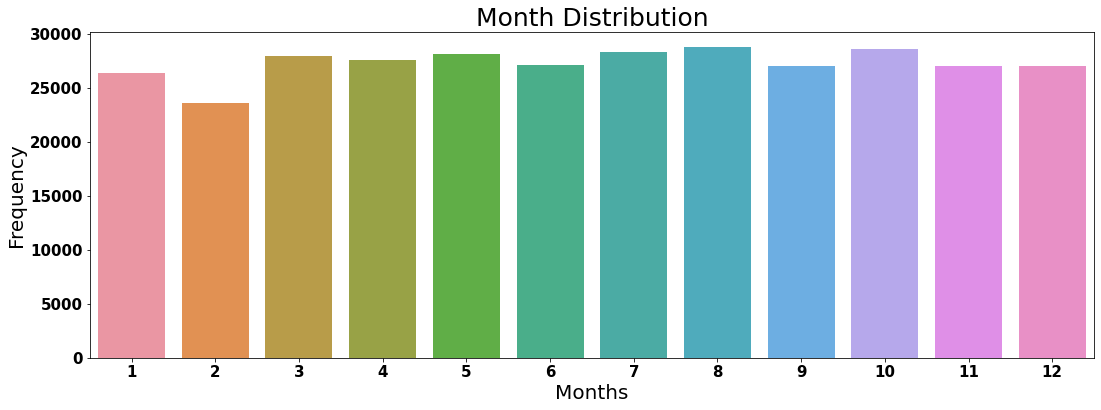

In [95]:
plt.figure(figsize = (18, 6))
sns.countplot(df['month'])
plt.title('Month Distribution', size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Months", size = 20)
plt.ylabel("Frequency", size = 20)
plt.show()

Flights are distributed fairly evenly among the months, but there is a slight decline at the beginning of the year in the month of __January__ and __February__

#### Market share of each Airline(`carrier`)

Let's see which airline(`carrier`) had most number of flights

c:\Users\G SAI TEJA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


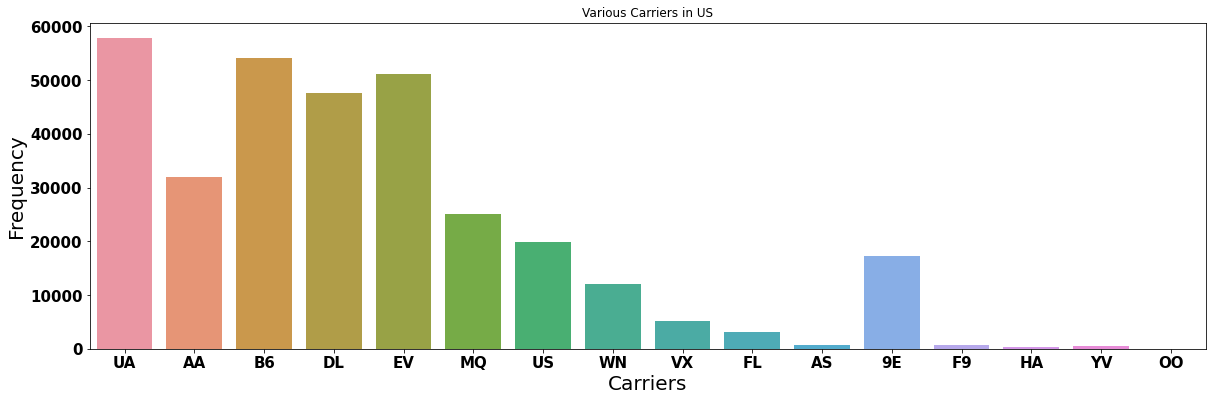

In [96]:
plt.figure(figsize = (20, 6))
sns.countplot(df['carrier'])
plt.title('Various Carriers in US')
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Carriers", size = 20)
plt.ylabel("Frequency", size = 20)
plt.show()

From the graph we can predict that the airline named *UA* operated the most with number of flights slightly less then __60k__.<br>
After that *B6* was the one coming second highest in ranking with around __55k__ flights.<br>
`Carrier` *VX*, *FL*, *AS*, *F9*, *HA*, *YV* and *OO* are not distinctly clear with the number of flights. So we'll count their values.

In [97]:
df['carrier'].value_counts().to_frame()

,carrier
UA,57782
B6,54049
EV,51108
DL,47658
AA,31947
MQ,25037
US,19831
9E,17294
WN,12044
VX,5116


In [98]:
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = df['dep_delay'].groupby(df['carrier']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
carrier,,,,
OO,-14.0,154.0,29.0,12.586207
HA,-16.0,1301.0,342.0,4.900585
YV,-16.0,387.0,544.0,18.898897
F9,-27.0,853.0,681.0,20.201175
AS,-21.0,225.0,709.0,5.830748
FL,-22.0,602.0,3175.0,18.605984
VX,-20.0,653.0,5116.0,12.756646
WN,-13.0,471.0,12044.0,17.661657
9E,-24.0,747.0,17294.0,16.439574


C:\Users\G SAI TEJA\AppData\Local\Temp\ipykernel_9504\1339715497.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])


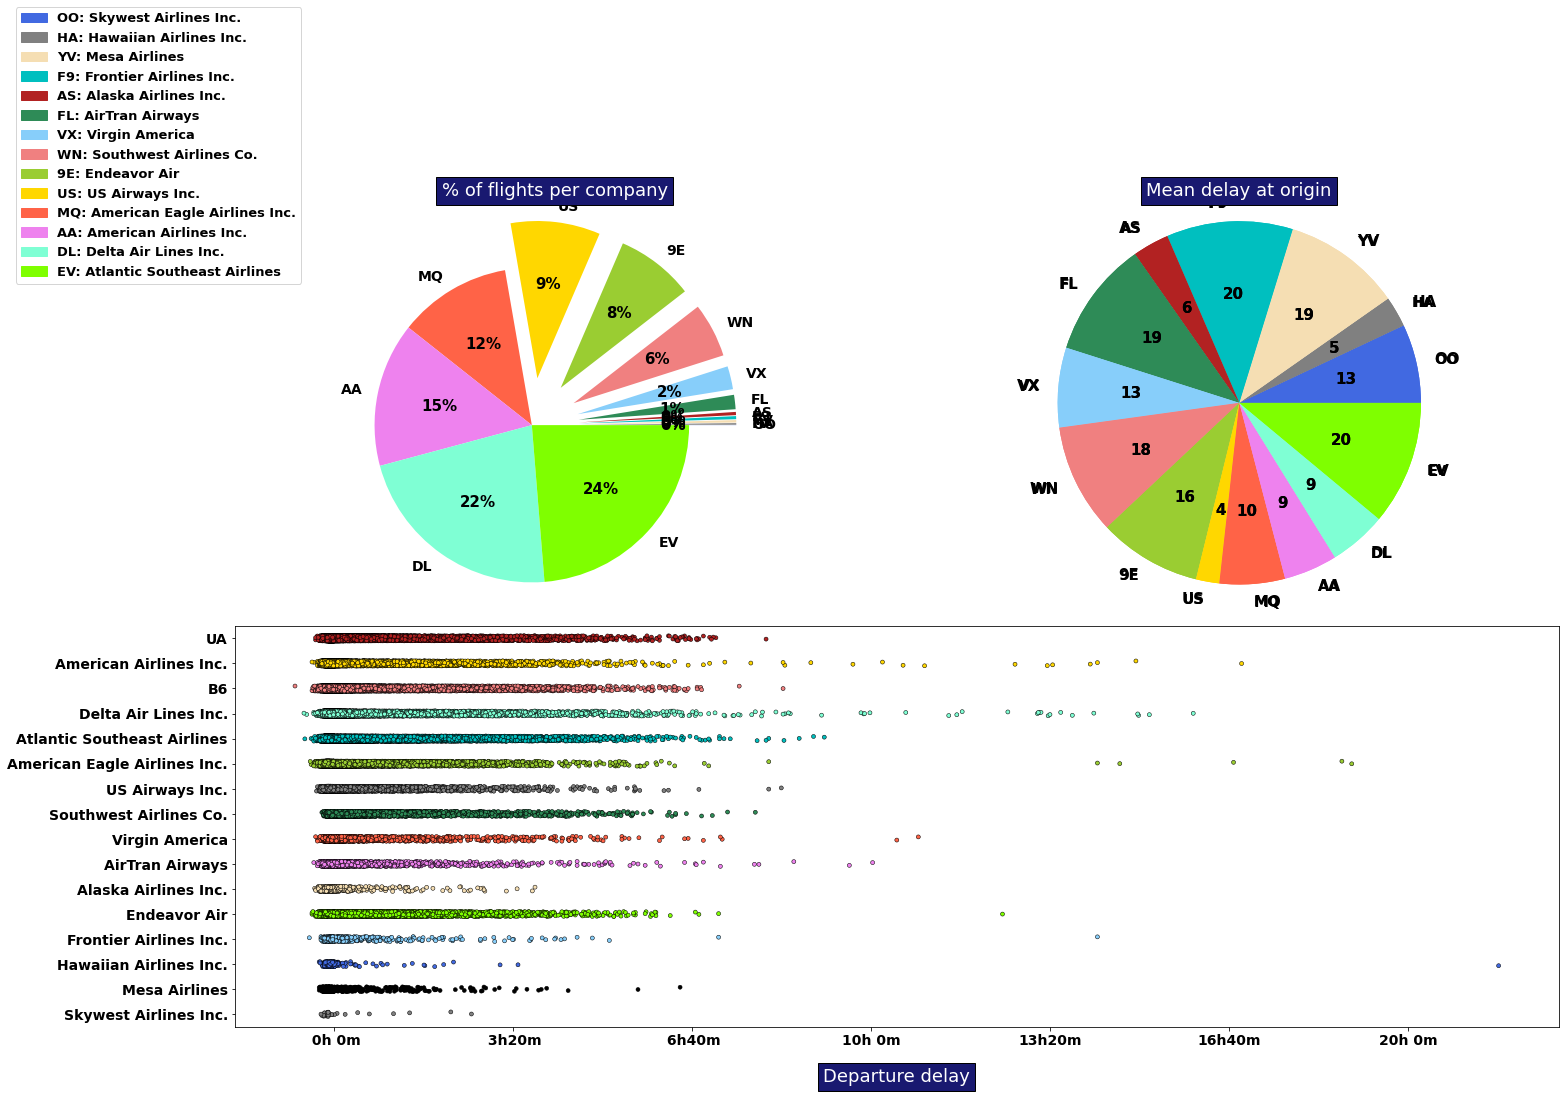

In [99]:
#___________________________________________
# graphs on flights, airports & delays
global_stats1 = global_stats
global_stats = global_stats1.head(14)
codes = global_stats.index.tolist()
carriers1 = carriers[carriers['IATA_CODE'].isin(codes)]
abbr_companies = carriers1.set_index('IATA_CODE')['AIRLINE'].to_dict()

font = {'family' : 'DejaVu Sans', 'weight' : 'bold', 'size'   : 15}
mpl.rc('font', **font)
import matplotlib.patches as mpatches
#__________________________________________________________________
# I extract a subset of columns and redefine the airlines labeling 
df2 = df.loc[:, ['carrier', 'dep_delay']]
df2['carrier'] = df2['carrier'].replace(abbr_companies)
#________________________________________________________________________
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
#___________________________________
fig = plt.figure(1, figsize=(22,17))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
ax3=fig.add_subplot(gs[1,:]) 
#------------------------------
# Pie chart nº1: nb of flights
#------------------------------
labels = [s for s in  global_stats.index]
sizes  = global_stats['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('% of flights per company', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(len(abbr_companies)):
    comp_handler.append(mpatches.Patch(color=colors[i],
            label = global_stats.index[i] + ': ' + abbr_companies[global_stats.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9), 
           fontsize = 13, bbox_transform=plt.gcf().transFigure)
#----------------------------------------
# Pie chart nº2: mean delay at departure
#----------------------------------------
# Pie chart nº2: mean delay at departure
sizes  = global_stats['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]  # This line defines explode
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))

patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Mean delay at origin', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)
#------------------------------------------------------
# striplot with all the values reported for the delays
#___________________________________________________________________
# I redefine the colors for correspondance with the pie charts
codes = global_stats1.index.tolist()
carriers1 = carriers[carriers['IATA_CODE'].isin(codes)]
abbr_companies = carriers1.set_index('IATA_CODE')['AIRLINE'].to_dict()

colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue', 
          'black', 'grey', 'white', 'silver', 'black', 'pink']
#___________________________________________________________________
ax3 = sns.stripplot(y="carrier", x="dep_delay", size = 4, palette = colors,
                    data=df2, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)
#________________________
plt.tight_layout(w_pad=3)

#### Plot Mean Delay of various Airline(`carrier`)

Text(0.5, 0, 'Mean delay [min] (@departure: blue, @arrival: hatch lines)')

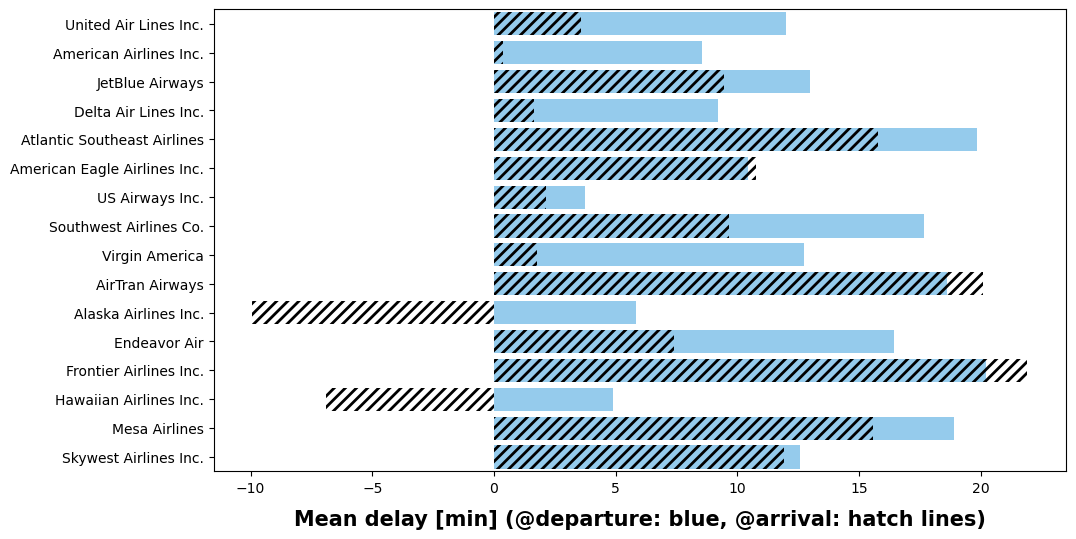

In [100]:
#plotting mean delays by airlines
carrier_code=carriers.set_index('IATA_CODE')['AIRLINE'].to_dict()
mpl.rc('patch', edgecolor = 'dimgray', linewidth = 1)
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0

fig = plt.figure(1, figsize = (11, 6))
ax = sns.barplot(x = 'dep_delay', y = 'carrier', data = df, color = 'lightskyblue', ci = None)
ax = sns.barplot(x = 'arr_delay', y = 'carrier', data = df, color = 'r', hatch = '///', alpha = 0.0, ci = None)
labels = [carrier_code[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.yaxis.label.set_visible(False)
plt.xlabel("Mean delay [min] (@departure: blue, @arrival: hatch lines)", fontsize = 15, weight = 'bold', labelpad = 10)

5 major carriers in US with their Mean Delay:
- __American Airlines- AA__
- __Delta Air Lines- DL__
- __Frontier Airlines- F9__
- __Hawaiian Airlines- HA__
- __JetBlue- B6__

Text(0.5, 0, "5 Major Carrier's Mean Delay [min] (@departure: blue, @arrival: hatch lines)")

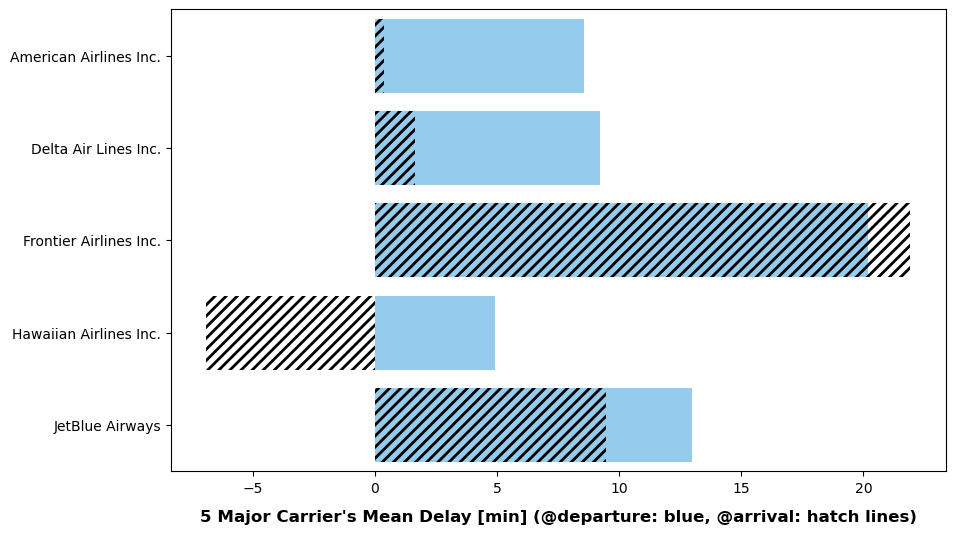

In [101]:
mpl.rc('patch', edgecolor = 'dimgray', linewidth = 1)
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0

fig = plt.figure(1, figsize = (10, 6))

#Subset 4 major airlines
ax = sns.barplot(x = 'dep_delay', y = 'carrier', data = df, order = ['AA', 'DL', 'F9', 'HA', 'B6'], color = 'lightskyblue', ci = None)
ax = sns.barplot(x = 'arr_delay', y = 'carrier', data = df, order = ['AA', 'DL', 'F9', 'HA', 'B6'], color = 'r', hatch = '///', alpha = 0.0, ci = None)
labels = [carrier_code[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.yaxis.label.set_visible(False)
plt.xlabel("5 Major Carrier's Mean Delay [min] (@departure: blue, @arrival: hatch lines)", fontsize = 12, weight = 'bold', labelpad = 10)

#### Plotting the Market Share of the Airports(`origin`) of New York 

In [102]:
df['origin'].value_counts().to_frame()

,origin
EWR,117127
JFK,109079
LGA,101140


|origin|airport|
|-|-|
|EWR|Newark Liberty International Airport|
|JFK|John F. Kennedy International Airport|
|LGA|LaGuardia Airport|

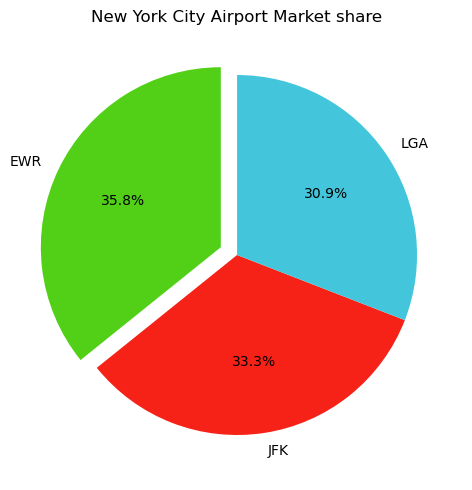

In [103]:
plt.pie(
    df['origin'].value_counts(),
    labels = df['origin'].value_counts().index,
    explode = (0.1, 0, 0),
    startangle = 90,
    autopct = '%1.1f%%',
    colors = ['#52D017', '#F62217', '#43C6DB']
)

plt.tight_layout()
plt.title("New York City Airport Market share")
plt.show()

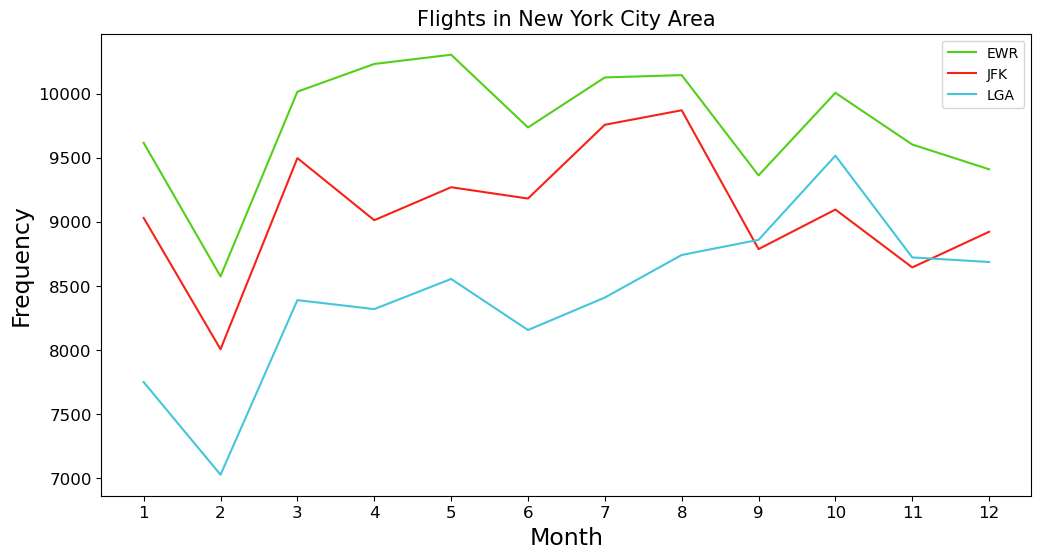

In [104]:
fig = plt.figure(1, figsize = (12, 6))
df[df['origin'] == 'EWR']['month'].value_counts().sort_index().plot(kind = 'line', color = '#52D017')
df[df['origin'] == 'JFK']['month'].value_counts().sort_index().plot(kind = 'line', color = '#F62217')
df[df['origin'] == 'LGA']['month'].value_counts().sort_index().plot(kind = 'line', color = '#43C6DB')

plt.title("Flights in New York City Area", size = 15)
plt.xticks(range(1, 13), size = 12)
plt.yticks(size = 12)
plt.xlabel("Month", size = 17)
plt.ylabel("Frequency", size = 17)
plt.legend(['EWR', 'JFK', 'LGA'])

## Modelling

In [105]:
def determine_delayed(departure_delay):
    if departure_delay>15:
        return 1  # Flight was delayed
    else:
        return 0  # Flight was not delayed

# Apply the function to each pair of values in the departure and arrival delay columns
df['departure_delay'] = df['sched_dep_time'] - df['dep_time']
df['delayed'] = df['departure_delay'].apply(determine_delayed)
df['delayed'].value_counts(normalize = True)

0    0.861938
1    0.138062
Name: delayed, dtype: float64

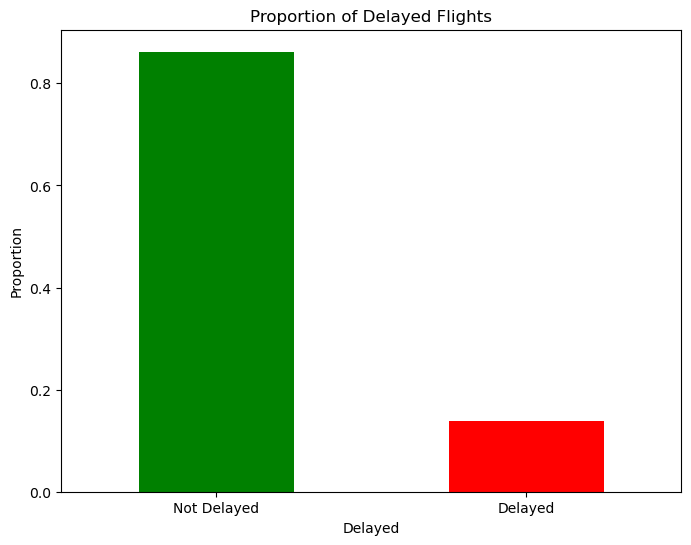

In [106]:
plt.figure(figsize=(8, 6))
df['delayed'].value_counts(normalize=True).plot(kind='bar', color=['green', 'red'])
plt.title('Proportion of Delayed Flights')
plt.xlabel('Delayed')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['Not Delayed', 'Delayed'], rotation=0)
plt.show()

In [107]:
#df['departure_delay']=df['departure_delay'].apply(lambda x:x if x>0 else -x)
#df['departure_delay']=df['departure_delay']+15

In [108]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,departure_delay,delayed
0,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00,-2,0
1,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00,-4,0
2,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00,-2,0
3,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00,1,0
4,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00,46,1


In [109]:
def convert_to_time(minutes):
    hours = minutes // 60
    remaining_minutes = minutes % 60
    return '{:02d}:{:02d}'.format(hours, remaining_minutes)

# Apply the function to the 'minutes' column and create a new column 'time_format'
df['time_format'] = df['departure_delay'].apply(convert_to_time)


In [110]:
df.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,departure_delay,delayed,time_format
0,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00,-2,0,-1:58
1,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00,-4,0,-1:56
2,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00,-2,0,-1:58
3,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00,1,0,00:01
4,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00,46,1,00:46


In [111]:
columns_to_remove = ['dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'flight', 'tailnum', 'air_time', 'distance', 'hour', 'minute', 'time_hour','departure_delay','time_format']
df.drop(columns_to_remove, axis = 1, inplace = True)

In [112]:
df.loc[df['carrier']=='UA','carrier']=0
df.loc[df['carrier']=='AA','carrier']=1
df.loc[df['carrier']=='B6','carrier']=2
df.loc[df['carrier']=='DL','carrier']=3
df.loc[df['carrier']=='EV','carrier']=4
df.loc[df['carrier']=='MQ','carrier']=5
df.loc[df['carrier']=='US','carrier']=6
df.loc[df['carrier']=='WN','carrier']=7
df.loc[df['carrier']=='VX','carrier']=8
df.loc[df['carrier']=='FL','carrier']=9
df.loc[df['carrier']=='AS','carrier']=10
df.loc[df['carrier']=='9E','carrier']=11
df.loc[df['carrier']=='F9','carrier']=12
df.loc[df['carrier']=='HA','carrier']=13
df.loc[df['carrier']=='YV','carrier']=14
df.loc[df['carrier']=='OO','carrier']=15

In [113]:
df.loc[df['origin']=='EWR','origin']=0
df.loc[df['origin']=='LGA','origin']=1
df.loc[df['origin']=='JFK','origin']=2

In [114]:
airport_codes = ['IAH', 'MIA', 'BQN', 'ATL', 'ORD', 'FLL', 'IAD', 'MCO', 'PBI',
                 'TPA', 'LAX', 'SFO', 'DFW', 'BOS', 'LAS', 'MSP', 'DTW', 'RSW',
                 'SJU', 'PHX', 'BWI', 'CLT', 'BUF', 'DEN', 'SNA', 'MSY', 'SLC',
                 'XNA', 'MKE', 'SEA', 'ROC', 'SYR', 'SRQ', 'RDU', 'CMH', 'JAX',
                 'CHS', 'MEM', 'PIT', 'SAN', 'DCA', 'CLE', 'STL', 'MYR', 'JAC',
                 'MDW', 'HNL', 'BNA', 'AUS', 'BTV', 'PHL', 'STT', 'EGE', 'AVL',
                 'PWM', 'IND', 'SAV', 'CAK', 'HOU', 'LGB', 'DAY', 'ALB', 'BDL',
                 'MHT', 'MSN', 'GSO', 'CVG', 'BUR', 'RIC', 'GSP', 'GRR', 'MCI',
                 'ORF', 'SAT', 'SDF', 'PDX', 'SJC', 'OMA', 'CRW', 'OAK', 'SMF',
                 'TUL', 'TYS', 'OKC', 'PVD', 'DSM', 'PSE', 'BHM', 'CAE', 'HDN',
                 'BZN', 'MTJ', 'EYW', 'PSP', 'ACK', 'BGR', 'ABQ', 'ILM', 'MVY',
                 'SBN', 'LEX', 'CHO', 'TVC', 'ANC', 'LGA']

# Create a mapping dictionary with airport codes and corresponding integer values
airport_mapping = {code: index for index, code in enumerate(airport_codes)}

# Replace values in the 'dest' column using the mapping dictionary
df['dest'] = df['dest'].replace(airport_mapping)


In [115]:
# feature omission
saving_data = df.to_csv("Data/delay.csv", index = False)

In [116]:
#print(df_filtered.head(15))

In [117]:
#print(df_filtered.shape)

In [118]:
#df.drop(df[df['dest'].isin(["LEX","TVC","MYR","CHO","BZN","JAC","PSP","EYW","HDN","MTJ","SBN","ANC"])].index, inplace = True , axis = 0)

In [119]:
#print(df.shape)

In [120]:
#df['delayed'].value_counts().to_frame()